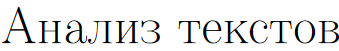

In [13]:
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold 
import numpy as np
import pandas as pd

### 1. Загрузка объектов из новостного датасета 20 newsgroups, относящиеся к категориям "космос"и "атеизм"

In [14]:
newsgroups = datasets.fetch_20newsgroups(subset='all', categories=['alt.atheism', 'sci.space'])
data = newsgroups.data
target = newsgroups.target

### 2. Вычисление TF-IDF-признаки для всех текстов.

In [15]:
vectorizer = TfidfVectorizer()
data_tf= vectorizer.fit_transform(data)

### 3. Подбор минимального лучшего параметра C из множества [$10^{-5}, 10^{−4}, ..., 10^{4}, 10^{5}$] для SVM с линейным ядром (kernel="linear") при помощи кросс-валидации по 5 блокам. 

In [16]:
param_c = {'C': [10**i for i in range(-5, 6)]}

kf = KFold(n_splits=5, shuffle=True, random_state=241)
svm = SVC(kernel="linear", random_state=241)
gs = GridSearchCV(svm, param_c, scoring="accuracy", cv=kf) #мера качества - доля верных ответов 

gs.fit(data_tf, target)
C = gs.best_params_.get('C')

### 4. Обучение SVM по всей выборке с лучшим параметром C, найденным на предыдущем шаге.

In [17]:
model = SVC(C=C, kernel="linear", random_state=241)
model.fit(data_tf, target)

SVC(C=1, kernel='linear', random_state=241)

### 5.Поиск 10 слов с наибольшим по модулю весом.

In [19]:
words = np.array(vectorizer.get_feature_names_out())
word_weights = pd.Series(model.coef_.data, index=words[model.coef_.indices], name="weight")
word_weights.index.name = "word"

top_words = word_weights.abs().sort_values(ascending=False).head(10)

for i, (word, weight) in enumerate(top_words.items()):
    print(f"{i+1}. {word} ({weight:.4f})")

1. space (2.6632)
2. god (1.9204)
3. atheism (1.2547)
4. atheists (1.2492)
5. moon (1.2016)
6. sky (1.1801)
7. religion (1.1391)
8. bible (1.1306)
9. keith (1.0971)
10. sci (1.0293)
